 # Сколько было продано квартир за 22-23 годы по всем классам жилья, результаты по покупке Физлицами у Юрлиц.

***Залачи:***
- **Сколько было продано квартир за 22-23 годы по всем классам жилья и иметь возможность посмотреть отдельно каждый жк. Показываться должны результаты по покупке Физлицами у Юрлиц.**


- сводная таблица в которой будут выделены следующие ЖК:
    - Остров 
    - Mod 
    - Матвеевский парк
    - Level Нагатинская
    - Зеленая вертикаль
    
    
- График отражающий в процентном соотношении покупки в ипотеку и без нее в этих ЖК.
- График в котором будет показано количество купленных квартир в каждом ЖК (и ипотека, и без вместе)
- График, на котором можно будет проследить долю каждого ЖК в общем своде продаж среди представленных ЖК (визуально - это один столбик с разного цвета и размера слоями)

## Загружаем библеотеки

In [1]:
import pandas as pd
import geopandas as gpd
import requests
import plotly.express as px
import matplotlib.pyplot as plt
import json
import folium
# импортируем карту и маркер
from folium import Map, Choropleth, Marker
# импортируем кластер
from folium.plugins import MarkerCluster
import re
from plotly import graph_objects as go

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Загружаем данные

In [2]:
try:
    excel_data = pd.read_scv(r'/datasets/data.csv')
except:
    # синтаксис указания пути для Windows
    excel_data = pd.read_csv(r"C:\Users\aznay\Downloads\data.csv")

C:\Users\aznay\AppData\Local\Temp\ipykernel_4868\467371123.py:5: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  excel_data = pd.read_csv(r"C:\Users\aznay\Downloads\data.csv")


In [3]:
excel_data = excel_data.drop('Unnamed: 0', axis=1)

In [4]:
excel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562082 entries, 0 to 562081
Data columns (total 23 columns):
 #   Column                                                Non-Null Count   Dtype  
---  ------                                                --------------   -----  
 0   Проект                                                562082 non-null  object 
 1   Округ                                                 561973 non-null  object 
 2   Адрес корпуса                                         562082 non-null  object 
 3   Класс                                                 559261 non-null  object 
 4   Девелопер                                             558688 non-null  object 
 5   Застройщик                                            540925 non-null  object 
 6   Дата договора                                         562082 non-null  object 
 7   Месяц и год даты договора                             562082 non-null  object 
 8   Квартал и год договора                      

In [5]:
excel_data.head(10)

Проект Округ                                      Адрес корпуса   Класс  \
0  Versis  ЮЗАО  Вавилова ул., к. 1, 2 (пересечение с Нахимовск...  Бизнес   
1  Versis  ЮЗАО  Вавилова ул., к. 1, 2 (пересечение с Нахимовск...  Бизнес   
2  Versis  ЮЗАО  Вавилова ул., к. 1, 2 (пересечение с Нахимовск...  Бизнес   
3  Versis  ЮЗАО  Вавилова ул., к. 1, 2 (пересечение с Нахимовск...  Бизнес   
4  Versis  ЮЗАО  Вавилова ул., к. 1, 2 (пересечение с Нахимовск...  Бизнес   
5  Versis  ЮЗАО  Вавилова ул., к. 1, 2 (пересечение с Нахимовск...  Бизнес   
6  Versis  ЮЗАО  Вавилова ул., к. 1, 2 (пересечение с Нахимовск...  Бизнес   
7  Versis  ЮЗАО  Вавилова ул., к. 1, 2 (пересечение с Нахимовск...  Бизнес   
8  Versis  ЮЗАО  Вавилова ул., к. 1, 2 (пересечение с Нахимовск...  Бизнес   
9  Versis  ЮЗАО  Вавилова ул., к. 1, 2 (пересечение с Нахимовск...  Бизнес   

         Девелопер       Застройщик Дата договора Месяц и год даты договора  \
0  Пересвет-Инвест  Пересвет-Инвест    2009-05-25                2009-05-01   
1  Пересвет-Инвест  Пересвет-Инвест    2009-05-25                2009-05-01   
2  Пересвет-Инвест  Пересвет-Инвест    2009-05-25                2009-05-01   
3  Пересвет-Инвест  Пересвет-Инвест    2009-05-25                2009-05-01   
4  Пересвет-Инвест  Пересвет-Инвест    2009-05-25                2009-05-01   
5  Пересвет-Инвест  Пересвет-Инвест    2009-05-25                2009-05-01   
6  Пересвет-Инвест  Пересвет-Инвест    2009-05-25                2009-05-01   
7  Пересвет-Инвест  Пересвет-Инвест    2009-06-11                2009-06-01   
8  Пересвет-Инвест  Пересвет-Инвест    2009-06-25                2009-06-01   
9  Пересвет-Инвест  Пересвет-Инвест    2009-09-10                2009-09-01   

  Квартал и год договора  Год договора       Тип сделки  \
0              2кв. 2009          2009  Договор участия   
1              2кв. 2009          2009  Договор участия   
2              2кв. 2009          2009  Договор участия   
3              2кв. 2009          2009  Договор участия   
4              2кв. 2009          2009  Договор участия   
5              2кв. 2009          2009  Договор участия   
6              2кв. 2009          2009  Договор участия   
7              2кв. 2009          2009  Договор участия   
8              2кв. 2009          2009  Договор участия   
9              3кв. 2009          2009  Договор участия   

                            ID лота Тип объекта Этаж Количество комнат  \
0  d421bcdcc9a35c5b13b71c2d0be49145    квартира   11                 3   
1  64f1dc40c70d0c1d62bc7dcea1125435    квартира   12                 3   
2  4b79afeef09e0879df08399ad68c2bfc    квартира   13                 2   
3  5e811d46007c8b2b74f7ba67f1ee3486    квартира   16                 2   
4  62212c94d665bf3c7916d435c9fa7aea    квартира   13                 1   
5  4bcfbc12cee249f51a805ef31010c5eb    квартира   12                 3   
6  8d426ac692783a163261b167db7e1fd2    квартира   20          Без типа   
7  77ecd886f949856534fef2719dca5fd3    квартира   12                 2   
8  f54b2682bfdb1220887dfa89449704a4    квартира   16                 1   
9  dc2d7b8780a8c8e609cdecea864bd83b    квартира   23                 4   

  Количество комнат в прайс-листе, типология bnmap.pro  Площадь согласно ПД  \
0                                                  3                  137.6   
1                                                  3                  117.0   
2                                                  2                   72.1   
3                                                  2                   93.4   
4                                                NaN                   57.4   
5                                                  3                  131.4   
6                                                NaN                  186.0   
7                                                  2                   75.1   
8                                                NaN                   57.6   
9                  

In [6]:
print(excel_data.columns.ravel())

['Проект' 'Округ' 'Адрес корпуса' 'Класс' 'Девелопер' 'Застройщик'
 'Дата договора' 'Месяц и год даты договора' 'Квартал и год договора'
 'Год договора' 'Тип сделки' 'ID лота' 'Тип объекта' 'Этаж'
 'Количество комнат'
 'Количество комнат в прайс-листе, типология bnmap.pro'
 'Площадь согласно ПД' 'Тип продавца' 'Тип покупателя' 'Тип ипотеки'
 'Залогодержатель/Банк' 'Кол-во месяцев обременения'
 'Участие объекта в оптовой сделке']


C:\Users\aznay\AppData\Local\Temp\ipykernel_4868\2887281218.py:1: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  print(excel_data.columns.ravel())


#### Данные 

датасет: Сделки МСК с февралем 2023.xlsx

***столбцы:***

- 'Проект' 
- 'Округ'
- 'Адрес корпуса'
- 'Класс'
- 'Девелопер' 
- 'Застройщик'
- 'Дата договора'
- 'Месяц и год даты договора'
- 'Квартал и год договора'
- 'Год договора'
- 'Тип сделки'
- 'ID лота'
- 'Тип объекта'
- 'Этаж'
- 'Количество комнат'
- 'Количество комнат в прайс-листе, типология bnmap.pro'
- 'Площадь согласно ПД'
- 'Тип продавца'
- 'Тип покупателя'
- 'Тип ипотеки'
- 'Залогодержатель/Банк'
- 'Кол-во месяцев обременения'
- 'Участие объекта в оптовой сделке'

# Обработка и фильтрация данных

In [7]:
excel_data['Класс'].unique()
excel_data['Тип объекта'].unique()

array(['квартира', 'машино-место', 'нежилое помещение', 'кладовка',
       'апартаменты'], dtype=object)

In [8]:
excel_data['Дата договора'] = pd.to_datetime(excel_data['Дата договора'])
excel_data['Месяц и год даты договора'] = pd.to_datetime(excel_data['Месяц и год даты договора'])

In [9]:
excel_data = excel_data[excel_data['Год договора'] >= 2022] 

In [10]:
excel_data = excel_data[excel_data['Тип продавца'] == 'ЮЛ']
excel_data = excel_data[excel_data['Тип покупателя'] == 'ФЛ']

In [11]:
excel_data = excel_data[excel_data['Тип объекта'] == 'квартира'] 

## Общий анализ, покажем лидеров рынка

***Отфильтруем ЖК в которых продали меньше 1000 квартир***

In [12]:
# Группировка данных по ЖК и подсчет суммарного количества квартир
grouped_excel_data = excel_data.groupby('Проект')['ID лота'].count().reset_index().sort_values(by='ID лота')
# жк где продано больше 500 квартир
grouped_excel_data_500 = grouped_excel_data[grouped_excel_data['ID лота'] > 1000] 

Проект  ID лота
28         Holland park     1039
37   Level Южнопортовая     1050
168         Перовское 2     1060
0     1-й Ленинградский     1076
149       Митинский лес     1085
108  Второй Нагатинский     1106
99     Бусиновский парк     1114
152    Мичуринский парк     1121
179        Руставели 14     1197
163              Остров     1276
153         Молжаниново     1376
91        Амурский парк     1459
146    Матвеевский парк     1869
144     Люблинский парк     2596

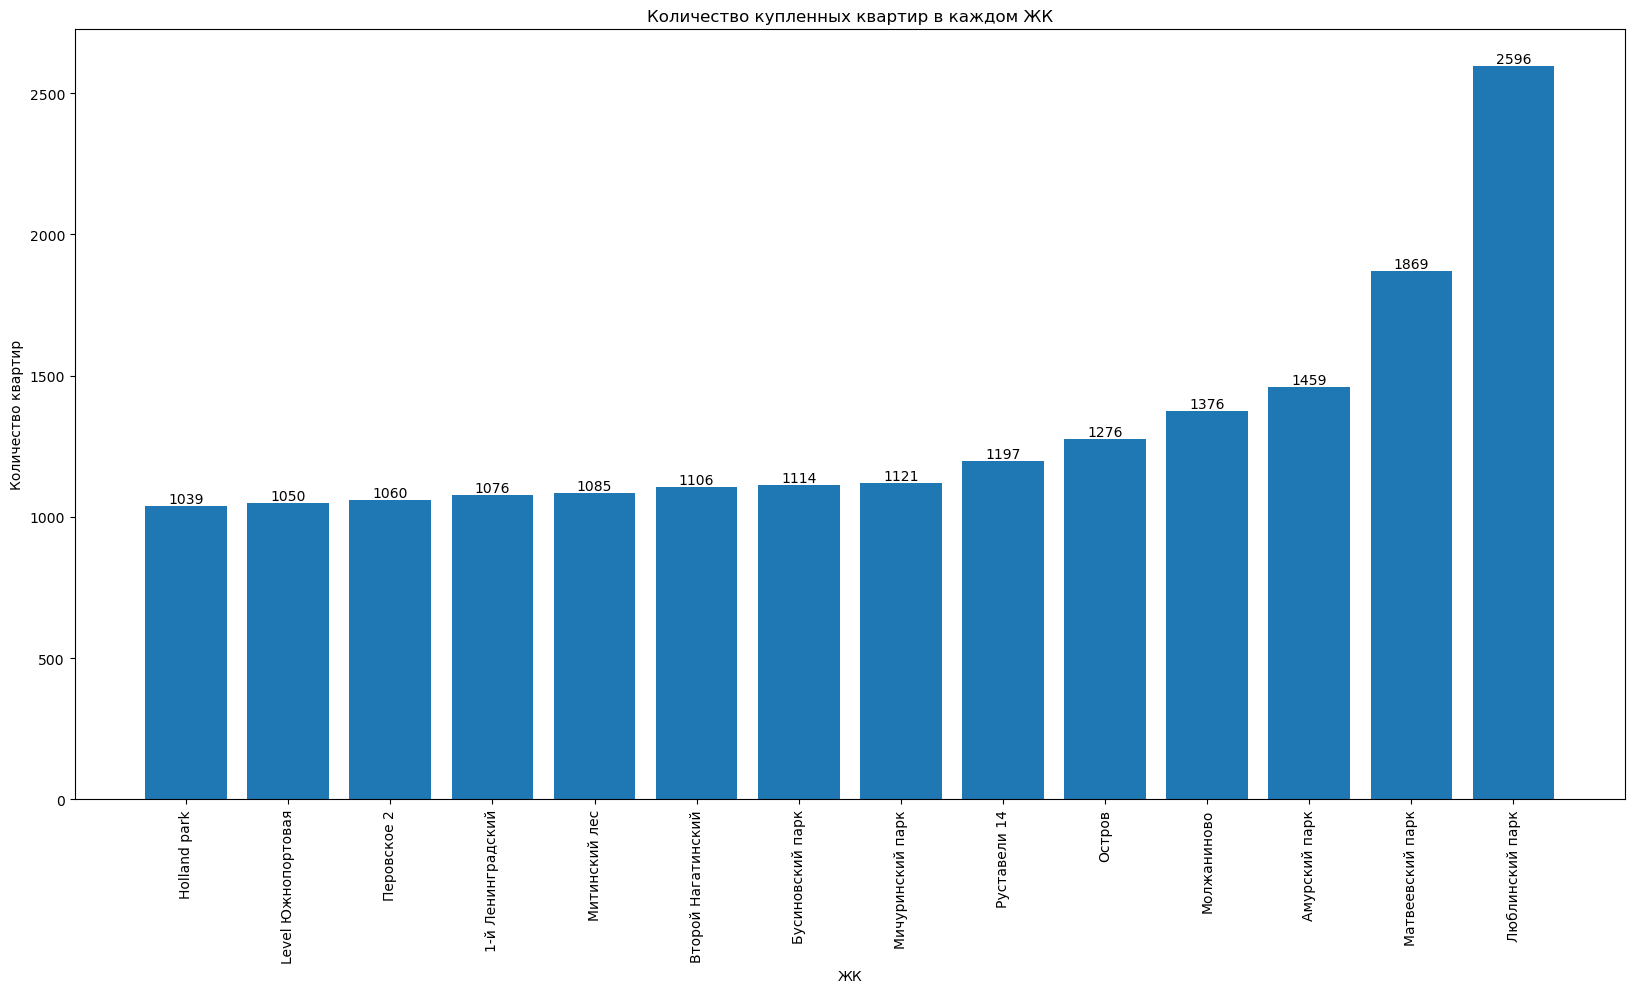

In [13]:
plt.figure(figsize=(20, 10))
display(grouped_excel_data_500)
# Построение графика
plt.bar(grouped_excel_data_500['Проект'], grouped_excel_data_500['ID лота'])
plt.xlabel('ЖК')
plt.ylabel('Количество квартир')
plt.title('Количество купленных квартир в каждом ЖК')

# Поворот подписей по оси x, чтобы они не перекрывались
plt.xticks(rotation=90)

# Добавление подписей с количеством над каждым столбцом
for i, value in enumerate(grouped_excel_data_500['ID лота']):
    plt.annotate(str(value), (i, value), ha='center', va='bottom')


# Отображение графика
plt.show()

**Комплексы "Люблинский парк", "Матвеевский парк" и "Остров" являются наиболее популярными среди покупателей, поскольку в них было продано большое количество квартир (2596, 1869 и 1276 соответственно). В то же время, комплексы "Holland park", "Level Южнопортовая" и "Перовское 2" имеют наименьшее количество проданных квартир (1039, 1050 и 1060 соответственно).**

In [14]:
transactions_district = excel_data.groupby('Округ', as_index=False)['ID лота'].agg('count').sort_values('ID лота', ascending=False)
transactions_district = transactions_district.rename(columns={'ID лота': 'transactions'})
display(transactions_district)
# строим столбчатую диаграмму 
fig = px.bar(transactions_district.sort_values(by='transactions', ascending=True), # загружаем данные и заново их сортируем
             x='transactions', # указываем столбец с данными для оси X
             y='Округ', # указываем столбец с данными для оси Y
             text='transactions' # добавляем аргумент, который отобразит текст с информацией
                                # о количестве объявлений внутри столбца графика
            )
# оформляем график
fig.update_layout(title='ТОП округов по количеству проданных квартир',
                   xaxis_title='Количество проданных квартир',
                   yaxis_title='Округ')
fig.show() # выводим график

Округ  transactions
8                         ЮВАО         12127
1                          ЗАО          9790
3                          САО          8640
5                         СЗАО          7721
7                          ЮАО          6937
4                         СВАО          6547
0                          ВАО          3344
9                         ЮЗАО          2222
6                          ЦАО          1067
2                        ЗелАО           946
10  мкр. Рублёво-Архангельское            28

***ЮВАО оказался самым популярным округом с наибольшим количеством проданных квартир, в то время как мкр. Рублёво-Архангельское имеет наименьшее количество продаж.***

##  Таблица в которой  следующие ЖК: Остров, Mod, Матвеевский парк, Level, Нагатинская, Зеленая вертикаль

In [15]:
# выделяем нужные жк
desired_complexes = ["Остров", "Mod", "Матвеевский парк", "Level Нагатинская", "Зеленая вертикаль"]

# фильтруем данные
filtered_df = excel_data[excel_data['Проект'].isin(desired_complexes)]

In [16]:
filtered_df = filtered_df.reset_index()
print(f"Всего сделок в данных по ЖК Остров, Mod, Матвеевский парк, Level Нагатинская, Зеленая вертикаль: {len(filtered_df)}")

Всего сделок в данных по ЖК Остров, Mod, Матвеевский парк, Level Нагатинская, Зеленая вертикаль: 4398


In [17]:
filtered_df.head(5)

index             Проект Округ        Адрес корпуса   Класс  \
0  411374  Зеленая вертикаль   ЮАО  Варшавское ш., к. 3  Эконом   
1  411717  Зеленая вертикаль   ЮАО  Варшавское ш., к. 2  Эконом   
2  411821  Зеленая вертикаль   ЮАО  Варшавское ш., к. 2  Эконом   
3  411822  Зеленая вертикаль   ЮАО  Варшавское ш., к. 2  Эконом   
4  411858  Зеленая вертикаль   ЮАО  Варшавское ш., к. 9  Эконом   

          Девелопер     Застройщик Дата договора Месяц и год даты договора  \
0  Э.К. Девелопмент  СЗ Варшавский    2022-01-12                2022-01-01   
1  Э.К. Девелопмент  СЗ Варшавский    2022-01-18                2022-01-01   
2  Э.К. Девелопмент  СЗ Варшавский    2022-01-20                2022-01-01   
3  Э.К. Девелопмент  СЗ Варшавский    2022-01-20                2022-01-01   
4  Э.К. Девелопмент  СЗ Варшавский    2022-01-21                2022-01-01   

  Квартал и год договора  Год договора       Тип сделки  \
0              1кв. 2022          2022  Договор участия   
1              1кв. 2022          2022  Договор участия   
2              1кв. 2022          2022  Договор участия   
3              1кв. 2022          2022  Договор участия   
4              1кв. 2022          2022  Договор участия   

                            ID лота Тип объекта Этаж Количество комнат  \
0  372aa323677c21eb3f3296eb2b4e2ec6    квартира   13                 1   
1  cbebe0fd9c094e6543daddbd7f4164be    квартира    3                 1   
2  12e0e7d7f5bd4b331702e3838f076425    квартира   10                 2   
3  77213972072802a2396f6d894b0034d7    квартира    2                 2   
4  7adcec4bae19a319768768347ca8c1a2    квартира   26                 1   

  Количество комнат в прайс-листе, типология bnmap.pro  Площадь согласно ПД  \
0                                                NaN                   38.5   
1                                                  1                   38.5   
2                                                  2                   59.2   
3                                                  2                   59.3   
4                                                  1                   40.8   

  Тип продавца Тип покупателя Тип ипотеки                Залогодержатель/Банк  \
0           ЮЛ             ФЛ     Ипотека                    АО "Газпромбанк"   
1           ЮЛ             ФЛ     Ипотека   "МОСКОВСКИЙ КРЕДИТНЫЙ БАНК" (ПАО)   
2           ЮЛ             ФЛ     Ипотека   "МОСКОВСКИЙ КРЕДИТНЫЙ БАНК" (ПАО)   
3           ЮЛ             ФЛ     Ипотека  Акционерное общество "Банк ДОМ.РФ"   
4           ЮЛ             ФЛ     Ипотека                   ПАО Промсвязьбанк   

   Кол-во месяцев обременения Участие объекта в оптовой сделке  
0                         NaN                              Нет  
1                         NaN                              Нет  
2                       348.0                              Нет  
3                       360.0                              Нет  
4                       240.0                              Нет

# График отражающий в процентном соотношении покупки в ипотеку и без нее в этих ЖК.

In [18]:
mortgage = filtered_df.groupby('Тип ипотеки').size().reset_index(name='Количество')

Тип ипотеки  Количество
0     Ипотека        2894
1         Нет        1504

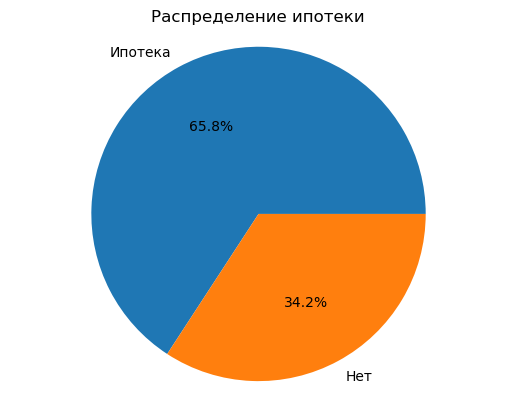

In [19]:
display(mortgage)
# Построение круговой диаграммы
plt.pie(mortgage['Количество'], labels=mortgage['Тип ипотеки'], autopct='%1.1f%%')
plt.title('Распределение ипотеки')
plt.axis('equal')

# Отображение диаграммы
plt.show()

***вывод:***
Большинство записей указывают на наличие ипотеки (2,894), в то время как небольшая часть записей (1,504) указывает, что ипотеки нет.

# График в котором будет показано количество купленных квартир в каждом ЖК (и ипотека, и без вместе)

In [20]:
# Группировка данных по ЖК и подсчет суммарного количества квартир
grouped_data = filtered_df.groupby('Проект')['ID лота'].count().reset_index().sort_values(by='ID лота')

Проект  ID лота
1                Mod      329
0  Level Нагатинская      359
2  Зеленая вертикаль      565
4             Остров     1276
3   Матвеевский парк     1869

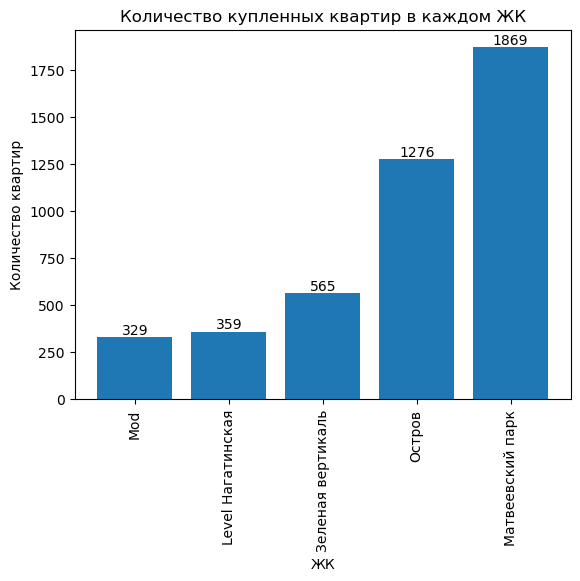

In [21]:
display(grouped_data)
# Построение графика
plt.bar(grouped_data['Проект'], grouped_data['ID лота'])
plt.xlabel('ЖК')
plt.ylabel('Количество квартир')
plt.title('Количество купленных квартир в каждом ЖК')

# Поворот подписей по оси x, чтобы они не перекрывались
plt.xticks(rotation=90)

# Добавление подписей с количеством над каждым столбцом
for i, value in enumerate(grouped_data['ID лота']):
    plt.annotate(str(value), (i, value), ha='center', va='bottom')


# Отображение графика
plt.show()

***Комплекс "Матвеевский парк" является наиболее популярным среди покупателей, поскольку в нем было продано наибольшее количество квартир (1869). Затем следуют комплексы "Остров" (1276), "Зеленая вертикаль" (565), "Level Нагатинская" (359) и "Mod" (329).***

In [22]:
#визуализулизация кросс-таблицы
def plot_cross_table(cross_table, title):
    fig, ax = plt.subplots(figsize=(10, 6))
    cross_table.plot(kind='bar', ax=ax)
    ax.set_title(title)
    ax.legend(title='Тип ипотеки', loc='upper left')
    ax.set_xlabel('')
    ax.set_ylabel('Количество квартир')
    plt.xticks(rotation=0)

    plt.show()

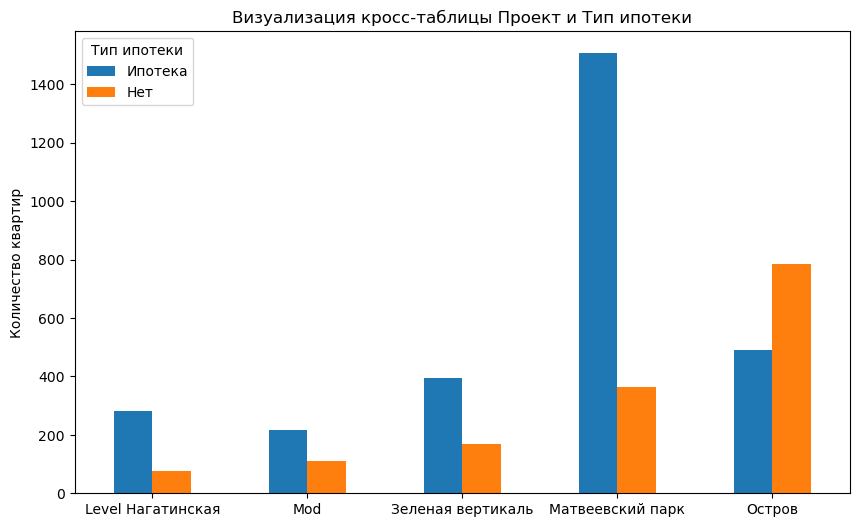

Тип ипотеки        Ипотека  Нет
Проект                         
Level Нагатинская      283   76
Mod                    218  111
Зеленая вертикаль      396  169
Матвеевский парк      1506  363
Остров                 491  785

In [23]:
def create_cross_table(df, column1, column2):
    cross_table = pd.crosstab(df[column1], df[column2])
    return cross_table
cross_table = create_cross_table(filtered_df, 'Проект', 'Тип ипотеки')
plot_cross_table(cross_table, 'Визуализация кросс-таблицы Проект и Тип ипотеки')
cross_table

**Проекты "Матвеевский парк" и "Остров" выделяются высоким количеством проданных квартир в обоих случаях - как с использованием ипотеки, так и без нее. В то время как проекты "Level Нагатинская", "Mod" и "Зеленая вертикаль" имеют более равномерное распределение проданных квартир между типами ипотеки.**

# График, на котором можно будет проследить долю каждого ЖК в общем своде продаж среди представленных ЖК (визуально - это один столбик с разного цвета и размера слоями)

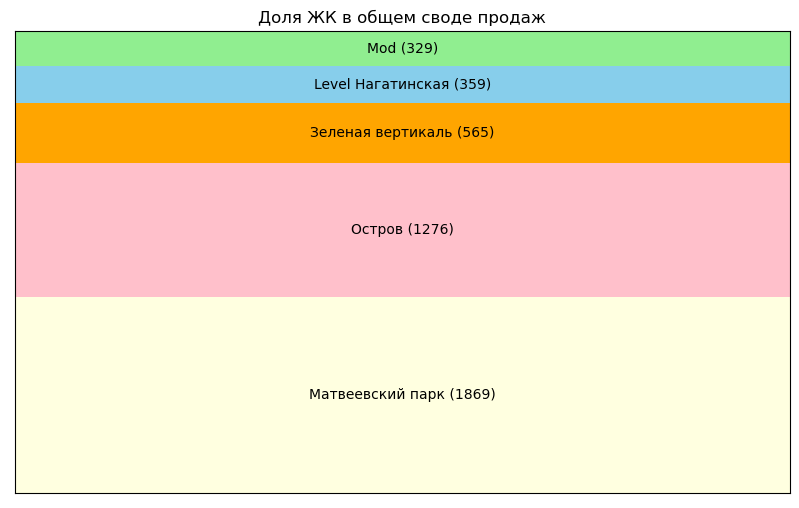

In [24]:
# Сортировка данных по столбцу 'ID лота' в порядке убывания
grouped_data = grouped_data.sort_values(by='ID лота', ascending=False)

# Создание графика
fig, ax = plt.subplots(figsize=(10, 6))
colors = ['skyblue', 'lightgreen', 'orange', 'lightyellow', 'pink']
bottom = 0

# Отрисовка столбцов в отсортированном порядке
for i, row in grouped_data.iterrows():
    ax.bar(0, row['ID лота'], bottom=bottom, color=colors[i % len(colors)], width=1)
    ax.annotate(f"{row['Проект']} ({row['ID лота']})", xy=(0, bottom + row['ID лота'] / 2), ha='center', va='center')
    bottom += row['ID лота']

# Настройка осей и заголовка
ax.set_xlim(-0.5, 0.5)
ax.set_ylim(0, sum(grouped_data['ID лота']))
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('Доля ЖК в общем своде продаж')

# Удаление лишних меток осей
ax.set_xticks([])
ax.set_yticks([])

# Вывод графика
plt.show()



- Матвеевский парк: 42.42%
- Остров: 28.97%
- Зеленая вертикаль: 12.85%
- Level Нагатинская: 8.16%
- Mod: 7.49%


- Матвеевский парк является лидером с долей продаж примерно в 42.42%. Это указывает на его высокую популярность и спрос среди покупателей.

- Остров занимает второе место с долей продаж около 28.97%. Он также пользуется значительным спросом на рынке недвижимости.

- Зеленая вертикаль занимает третье место с долей продаж около 12.85%. Этот ЖК также имеет значительную долю продаж, хотя ниже, чем у Матвеевского парка и Острова.

- Level Нагатинская и Mod имеют меньшую долю продаж в общем своде (соответственно около 8.16% и 7.49%). Это может указывать на меньшую популярность или более недавнее появление на рынке данных ЖК.

In [25]:
district = filtered_df.groupby('Округ', as_index=False)['ID лота'].agg('count').sort_values('ID лота', ascending=False)

In [26]:
district = district.rename(columns={'ID лота': 'transactions'})
display(district)
# строим столбчатую диаграмму 
fig = px.bar(district.sort_values(by='transactions', ascending=True), # загружаем данные и заново их сортируем
             x='transactions', # указываем столбец с данными для оси X
             y='Округ', # указываем столбец с данными для оси Y
             text='transactions' # добавляем аргумент, который отобразит текст с информацией
                                # о количестве объявлений внутри столбца графика
            )
# оформляем график
fig.update_layout(title='ТОП округов по количеству проданных квартир',
                   xaxis_title='Количество проданных квартир',
                   yaxis_title='Округ')
fig.show() # выводим график

Округ  transactions
0   ЗАО          1869
2  СЗАО          1276
3   ЮАО           924
1  СВАО           329

ЗАО (Западное административное округа) является наиболее популярным районом с наибольшим количеством продаж квартир.

СЗАО (Северо-Западное административное округа) и ЮАО (Южное административное округа) также имеют высокую активность на рынке недвижимости и значительное количество проданных квартир.

СВАО (Северо-Восточное административное округа) имеет меньшую активность на рынке по сравнению с другими рассмотренными районами.

Общий вывод состоит в том, что ЗАО, СЗАО и ЮАО являются наиболее привлекательными и востребованными районами для покупки квартир, в то время как СВАО имеет немного меньшую активность.

# Вывод

- **Жилые комплексы Матвеевский парк и Остров выделяются на рынке недвижимости, так как они имеют самые высокие показатели по количеству проданных квартир. Это указывает на их популярность и привлекательность среди покупателей.**


- **Общий вывод состоит в том, что ЗАО, СЗАО и ЮАО являются наиболее привлекательными и востребованными районами для покупки квартир, в то время как СВАО имеет немного меньшую активность.**


- **В использовании ипотеки преобладает тип "Ипотека" по сравнению с "Нет". Это указывает на то, что многие покупатели предпочитают использовать ипотечное финансирование для приобретения квартир.**


- **Анализ данных о типе ипотеки по каждому жилому комплексу позволяет увидеть предпочтения покупателей в отношении использования ипотеки. Некоторые ЖК имеют более высокую долю продаж с использованием ипотеки, в то время как в других ЖК доля продаж без ипотеки может быть выше. Это может свидетельствовать о разных предпочтениях и возможностях покупателей.**

# Дополнительная проработка

### Посмотрим детальнее продажи по типам ипотеки

In [27]:
def plot_pie_chart(data, label_column, value_column, title):
    plt.pie(data[value_column], labels=data[label_column], autopct='%1.1f%%')
    plt.title(title)
    plt.axis('equal')
    plt.show()

In [28]:
for project in desired_complexes:
    df_project = filtered_df[filtered_df['Проект'] == project]
    # готовим данные для графика
    df_mortgage = pd.DataFrame(df_project['Тип ипотеки'].value_counts()).reset_index()
    # строим диаграмму с сегментами
    fig = go.Figure(data=[go.Pie(labels=df_mortgage['index'], # указываем значения, которые появятся на метках сегментов
                                 values=df_mortgage['Тип ипотеки'], # указываем данные, которые отобразятся на графике
                                 pull = [0.1, 0])]) # добавляем аргумент, который выделит сегмент-лидер на графике
    fig.update_layout(title='Распределение ипотеки в ЖК {}'.format(project), # указываем заголовок графика
                      width=800, # указываем размеры графика
                      height=600,
                      annotations=[dict(x=1.12, # вручную настраиваем аннотацию легенды
                                        y=1.05,
                                        text='Тип ипотеки',
                                        showarrow=False)])
    fig.show() # выводим графи
    display(df_mortgage)

index  Тип ипотеки
0      Нет          785
1  Ипотека          491

index  Тип ипотеки
0  Ипотека          218
1      Нет          111

index  Тип ипотеки
0  Ипотека         1506
1      Нет          363

index  Тип ипотеки
0  Ипотека          283
1      Нет           76

index  Тип ипотеки
0  Ипотека          396
1      Нет          169

## Участие объекта в оптовой сделке

In [29]:
for project in desired_complexes:
    df_project = filtered_df[filtered_df['Проект'] == project]
    # готовим данные для графика
    df_rooms = pd.DataFrame(df_project['Участие объекта в оптовой сделке'].value_counts()).reset_index()
    # строим диаграмму с сегментами
    fig = go.Figure(data=[go.Pie(labels=df_rooms['index'], # указываем значения, которые появятся на метках сегментов
                                 values=df_rooms['Участие объекта в оптовой сделке'], # указываем данные, которые отобразятся на графике
                                 pull = [0.1, 0])]) # добавляем аргумент, который выделит сегмент-лидер на графике
    fig.update_layout(title='Участие объекта в оптовой сделке ЖК {}'.format(project), # указываем заголовок графика
                      width=800, # указываем размеры графика
                      height=600,
                      annotations=[dict(x=1.12, # вручную настраиваем аннотацию легенды
                                        y=1.05,
                                        text='Участие объекта в оптовой сделке',
                                        showarrow=False)])
    fig.show() # выводим графи

Из представленных данных можно сделать вывод, что использование ипотечного финансирования является распространенной практикой при покупке квартир во всех рассмотренных жилых комплексах. Однако, уровень использования ипотеки может отличаться в каждом ЖК.

- Жилой комплекс "Остров" и "Mod" имеют меньшую долю покупок с использованием ипотеки по сравнению с количеством покупок без ипотеки. В этих ЖК большинство покупателей предпочитают приобретать квартиры без использования ипотечного финансирования.


- Жилой комплекс "Матвеевский парк" и "Зеленая вертикаль" имеют высокую долю покупок с использованием ипотеки. Большинство покупателей в этих ЖК предпочитают использовать ипотечное финансирование для приобретения квартир.


- Жилой комплекс "Level Нагатинская" также имеет значительное количество покупок с использованием ипотеки, хотя и в меньшем объеме по сравнению с другими ЖК.


**Общий вывод состоит в том, что ипотека широко используется во всех рассмотренных жилых комплексах, но уровень использования может различаться**

## Посмотрим Количество комнат в прайс-листе, типология bnmap.pro

In [30]:
def plot_bar_chart(data, x_column, y_column, title):
    plt.bar(data[x_column], data[y_column])
    plt.xlabel(x_column)
    plt.ylabel('Количество квартир')
    plt.title(title)
    plt.xticks(rotation=90)
    for i, value in enumerate(data[y_column]):
        plt.annotate(str(value), (i, value), ha='center', va='bottom')
    plt.show()

In [31]:
for project in desired_complexes:
    df_project = filtered_df[filtered_df['Проект'] == project]
    # готовим данные для графика
    df_rooms = pd.DataFrame(df_project['Количество комнат в прайс-листе, типология bnmap.pro'].value_counts()).reset_index()
    # строим диаграмму с сегментами
    fig = go.Figure(data=[go.Pie(labels=df_rooms['index'], # указываем значения, которые появятся на метках сегментов
                                 values=df_rooms['Количество комнат в прайс-листе, типология bnmap.pro'], # указываем данные, которые отобразятся на графике
                                 pull = [0.1, 0])]) # добавляем аргумент, который выделит сегмент-лидер на графике
    fig.update_layout(title='Число квартир по количеству комнат типология bnmap.pro {}'.format(project), # указываем заголовок графика
                      width=800, # указываем размеры графика
                      height=600,
                      annotations=[dict(x=1.12, # вручную настраиваем аннотацию легенды
                                        y=1.05,
                                        text='Количество комнат в прайс-листе, типология bnmap.pro',
                                        showarrow=False)])
    display(df_rooms)
    fig.show() # выводим графики
    

index  Количество комнат в прайс-листе, типология bnmap.pro
0     2                                                479   
1     1                                                299   
2     3                                                260   
3     4                                                113   
4    ст                                                 96

index  Количество комнат в прайс-листе, типология bnmap.pro
0     1                                                113   
1     2                                                112   
2     3                                                 80   
3    ст                                                 11   
4     4                                                  6

index  Количество комнат в прайс-листе, типология bnmap.pro
0     1                                                828   
1     2                                                521   
2    ст                                                322   
3     3                                                197

index  Количество комнат в прайс-листе, типология bnmap.pro
0     1                                                160   
1     2                                                113   
2    ст                                                 77   
3     3                                                  2   
4     4                                                  1

index  Количество комнат в прайс-листе, типология bnmap.pro
0     1                                                254   
1     2                                                187   
2     3                                                 31   
3     4                                                 20

- Жилой комплекс "Остров": В данном ЖК наибольшее количество квартир представлено с 2 комнатами, что указывает на популярность такого типа жилья среди покупателей. Квартиры с 1 и 3 комнатами также представлены в значительном количестве, что свидетельствует о разнообразии предложения.


- Жилой комплекс "Mod": В данном ЖК наибольшее количество квартир имеют 1 и 2 комнаты, что говорит о спросе на небольшие и средние по площади квартиры. Квартиры с 3 комнатами и более представлены в меньшем количестве.


- Жилой комплекс "Матвеевский парк": В этом ЖК наибольшее количество квартир представлено с 1 и 2 комнатами, что указывает на популярность небольших и средних по площади вариантов жилья. Кроме того, студии и квартиры с 3 комнатами также представлены в значительном количестве.


- Жилой комплекс "Level Нагатинская": В данном ЖК наиболее распространены квартиры с 1 и 2 комнатами, что указывает на популярность компактного жилья среди покупателей. Квартиры со студией и большим количеством комнат представлены в меньшем количестве.


- Жилой комплекс "Зеленая вертикаль": В данном ЖК наибольшее количество квартир имеют 1 и 2 комнаты, что говорит о популярности небольших по площади вариантов жилья. Квартиры с 3 и 4 комнатами представлены в меньшем количестве.

**В рассмотренных жилых комплексах представлено разнообразие вариантов по количеству комнат, с наибольшим спросом на квартиры с 1 и 2 комнатами.**

## Посмотрим количество комнат

In [32]:
for project in desired_complexes:
    df_project = filtered_df[filtered_df['Проект'] == project]
    # готовим данные для графика
    df_rooms = pd.DataFrame(df_project['Количество комнат'].value_counts()).reset_index()
    # строим диаграмму с сегментами
    fig = go.Figure(data=[go.Pie(labels=df_rooms['index'], # указываем значения, которые появятся на метках сегментов
                                 values=df_rooms['Количество комнат'], # указываем данные, которые отобразятся на графике
                                 pull = [0.1, 0])]) # добавляем аргумент, который выделит сегмент-лидер на графике
    fig.update_layout(title='Число квартир по количеству комнат {}'.format(project), # указываем заголовок графика
                      width=800, # указываем размеры графика
                      height=600,
                      annotations=[dict(x=1.12, # вручную настраиваем аннотацию легенды
                                        y=1.05,
                                        text='Количество комнат',
                                        showarrow=False)])
    display(df_rooms)
    fig.show() # выводим графи

index  Количество комнат
0     1                601
1     2                566
2     3                 94
3     4                 13
4     5                  2

index  Количество комнат
0     2                118
1     1                114
2     3                 80
3    ст                 11
4     4                  6

index  Количество комнат
0     1               1026
1     2                524
2     3                205
3    ст                114

index  Количество комнат
0     2                156
1     1                 96
2     3                 55
3    ст                 51
4     4                  1

index  Количество комнат
0     1                275
1     2                220
2     3                 33
3     4                 20
4    ст                 17

- Жилой комплекс "Остров": В данном ЖК наибольшее количество квартир имеют 1 комнату (601), за которыми следуют квартиры с 2 комнатами (566). Квартиры с 3, 4 и 5 комнатами представлены в меньшем количестве.


- Жилой комплекс "Mod": В данном ЖК наибольшее количество квартир имеют 2 комнаты (118), за которыми следуют квартиры с 1 комнатой (114) и 3 комнатами (80). Квартиры со студией (11) и 4 комнатами (6) представлены в меньшем количестве.


- Жилой комплекс "Матвеевский парк": В данном ЖК наибольшее количество квартир имеют 1 комнату (1026), за которыми следуют квартиры с 2 комнатами (524) и 3 комнатами (205). Квартиры со студией (114) представлены в меньшем количестве.


- Жилой комплекс "Level Нагатинская": В данном ЖК наибольшее количество квартир имеют 2 комнаты (156), за которыми следуют квартиры с 1 комнатой (96) и 3 комнатами (55). Квартиры со студией (51) и 4 комнатами (1) представлены в меньшем количестве.


- Жилой комплекс "Зеленая вертикаль": В данном ЖК наибольшее количество квартир имеют 1 комнату (275), за которой следуют квартиры с 2 комнатами (220). Квартиры с 3 комнатами (33) и 4 комнатами (20), а также студии (17), представлены в меньшем количестве.


Обобщая данные, можно сделать вывод, что в рассмотренных жилых комплексах наиболее популярны квартиры с 1 и 2 комнатами.

## Посмотрим застройщика

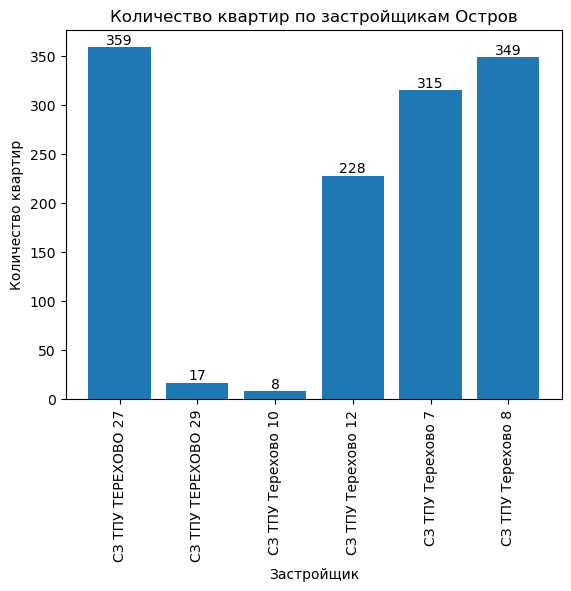

Застройщик  ID лота
0  СЗ ТПУ ТЕРЕХОВО 27      359
1  СЗ ТПУ ТЕРЕХОВО 29       17
2  СЗ ТПУ Терехово 10        8
3  СЗ ТПУ Терехово 12      228
4   СЗ ТПУ Терехово 7      315
5   СЗ ТПУ Терехово 8      349

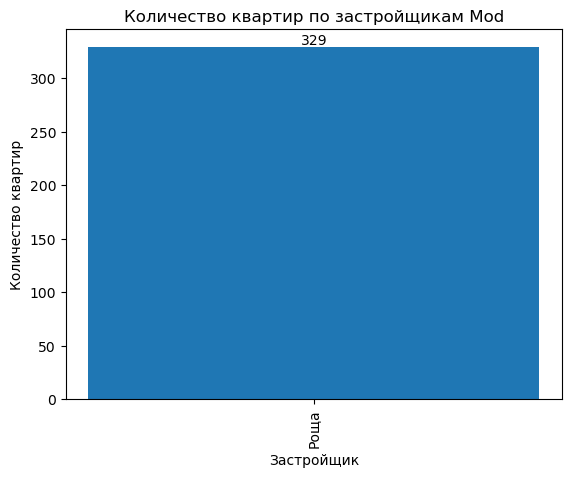

Застройщик  ID лота
0       Роща      329

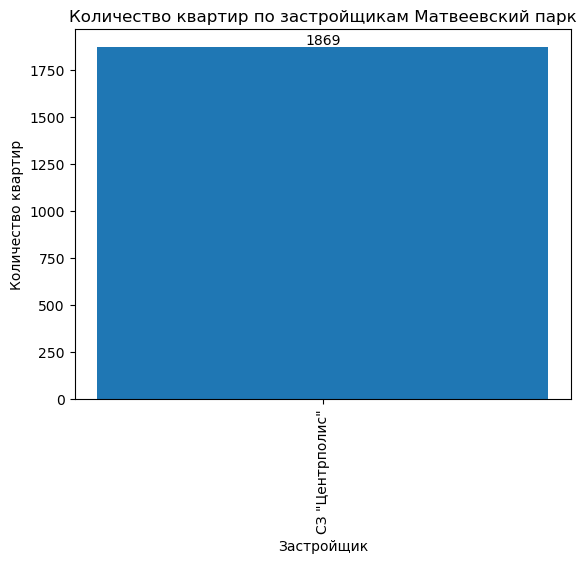

Застройщик  ID лота
0  СЗ "Центрполис"     1869

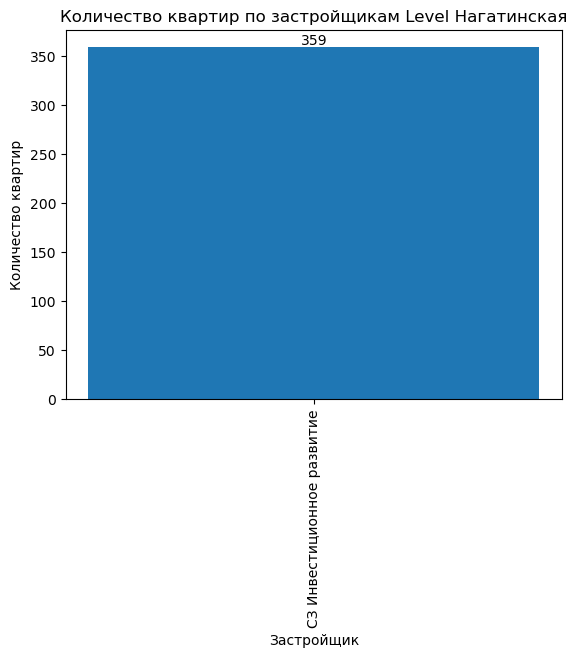

Застройщик  ID лота
0  СЗ Инвестиционное развитие      359

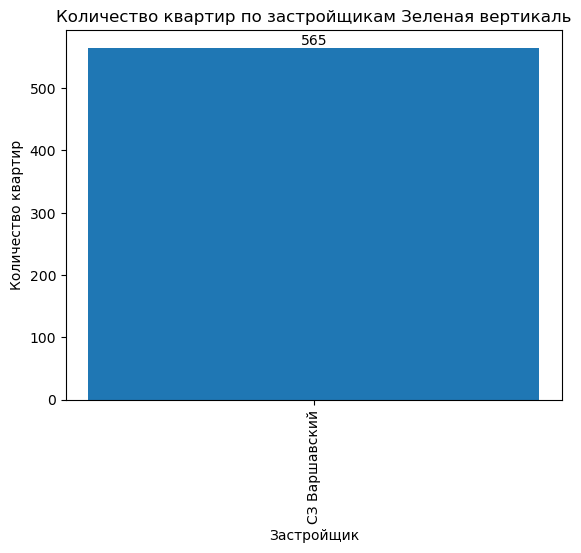

Застройщик  ID лота
0  СЗ Варшавский      565

In [33]:
for project in desired_complexes:
  
    grouped_developer = filtered_df[filtered_df['Проект'] == project].groupby('Застройщик')['ID лота'].count().reset_index()
    plot_bar_chart(grouped_developer, 'Застройщик', 'ID лота', 'Количество квартир по застройщикам {}'.format(project))
    display(grouped_developer)

- Жилой комплекс "Остров": В данном ЖК наибольшее количество квартир принадлежит застройщику "СЗ ТПУ Терехово_27" (359), за которым следуют застройщики "СЗ ТПУ Терехово_7" (315) и "СЗ ТПУ Терехово_8" (349). Остальные застройщики представлены в меньшем количестве квартир.


- Жилой комплекс "Mod": В данном ЖК наибольшее количество квартир принадлежит застройщику "Роща" (329).


- Жилой комплекс "Матвеевский парк": В данном ЖК все квартиры принадлежат застройщику "СЗ Центрполис" (1869).


- Жилой комплекс "Level Нагатинская": В данном ЖК все квартиры принадлежат застройщику "СЗ Инвестиционное развитие" (359).


- Жилой комплекс "Зеленая вертикаль": В данном ЖК все квартиры принадлежат застройщику "СЗ Варшавский" (565).

**Можно сделать вывод, что в каждом из рассмотренных жилых комплексов присутствует один основной застройщик, который владеет большинством квартир. Это может указывать на то, что данные жилые комплексы являются проектами одного или нескольких крупных застройщиков.**

## Посмотрим Залогодержатель/Банк

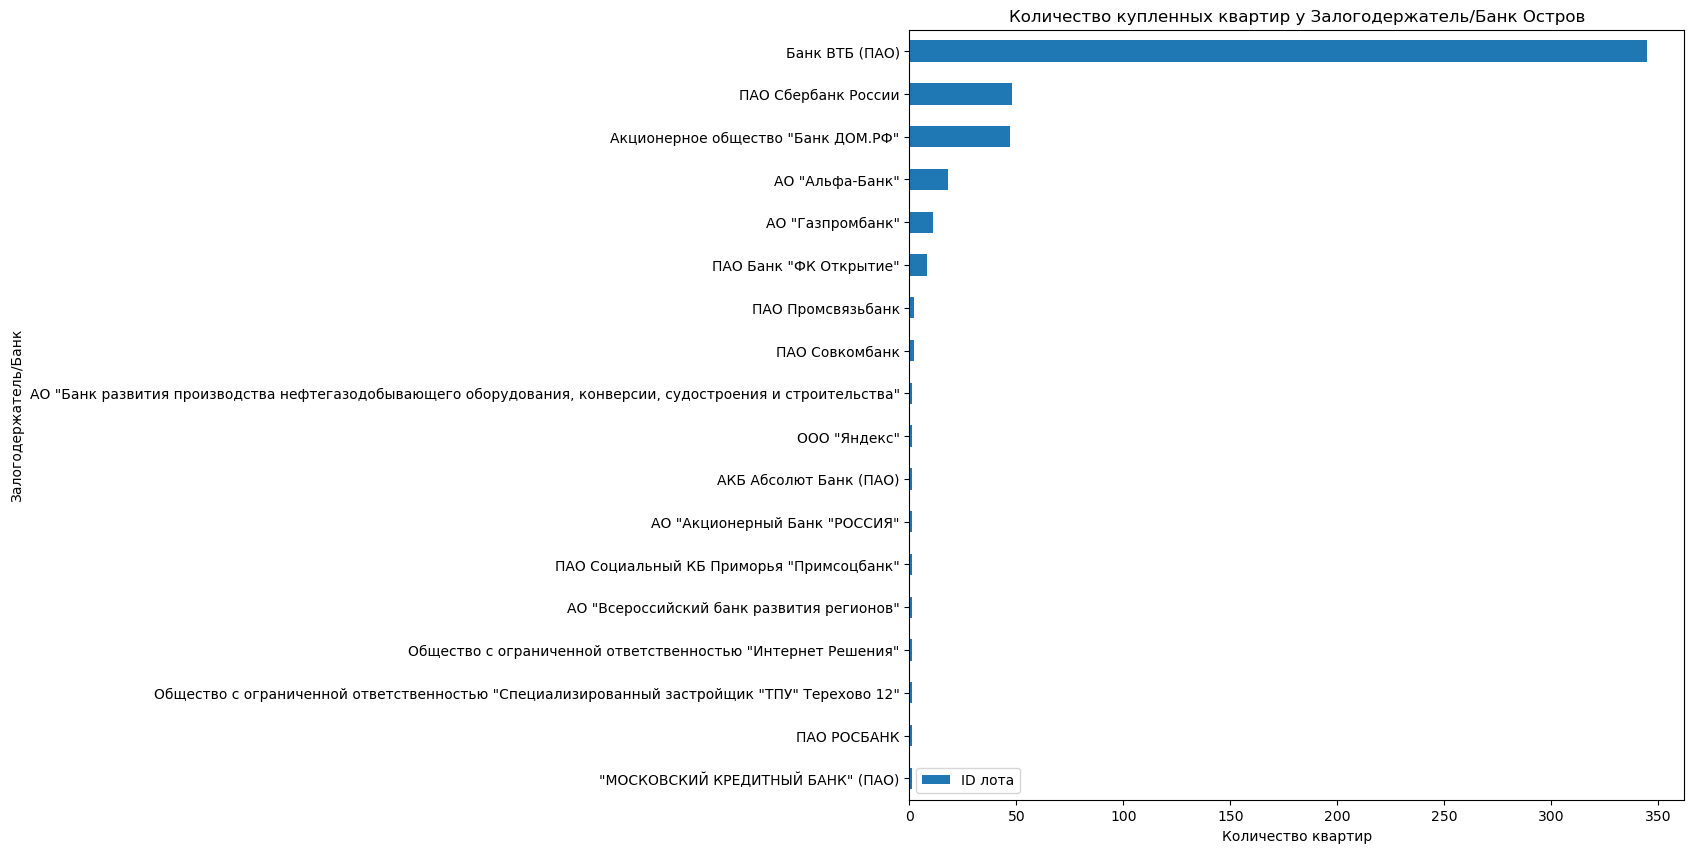

Залогодержатель/Банк  ID лота
0                   "МОСКОВСКИЙ КРЕДИТНЫЙ БАНК" (ПАО)        1
14                                        ПАО РОСБАНК        1
11  Общество с ограниченной ответственностью "Спец...        1
10  Общество с ограниченной ответственностью "Инте...        1
6           АО "Всероссийский банк развития регионов"        1
17           ПАО Социальный КБ Приморья "Примсоцбанк"        1
3                       АО "Акционерный Банк "РОССИЯ"        1
2                              АКБ Абсолют Банк (ПАО)        1
1                                        OOO "Яндекс"        1
5   АО "Банк развития производства нефтегазодобыва...        1
16                                     ПАО Совкомбанк        2
13                                  ПАО Промсвязьбанк        2
12                             ПАО Банк "ФК Открытие"        8
7                                    АО "Газпромбанк"       11
4                                     АО "Альфа-Банк"       18
8                  Акционерное общество "Банк ДОМ.РФ"       47
15                                ПАО Сбербанк России       48
9                                      Банк ВТБ (ПАО)      345

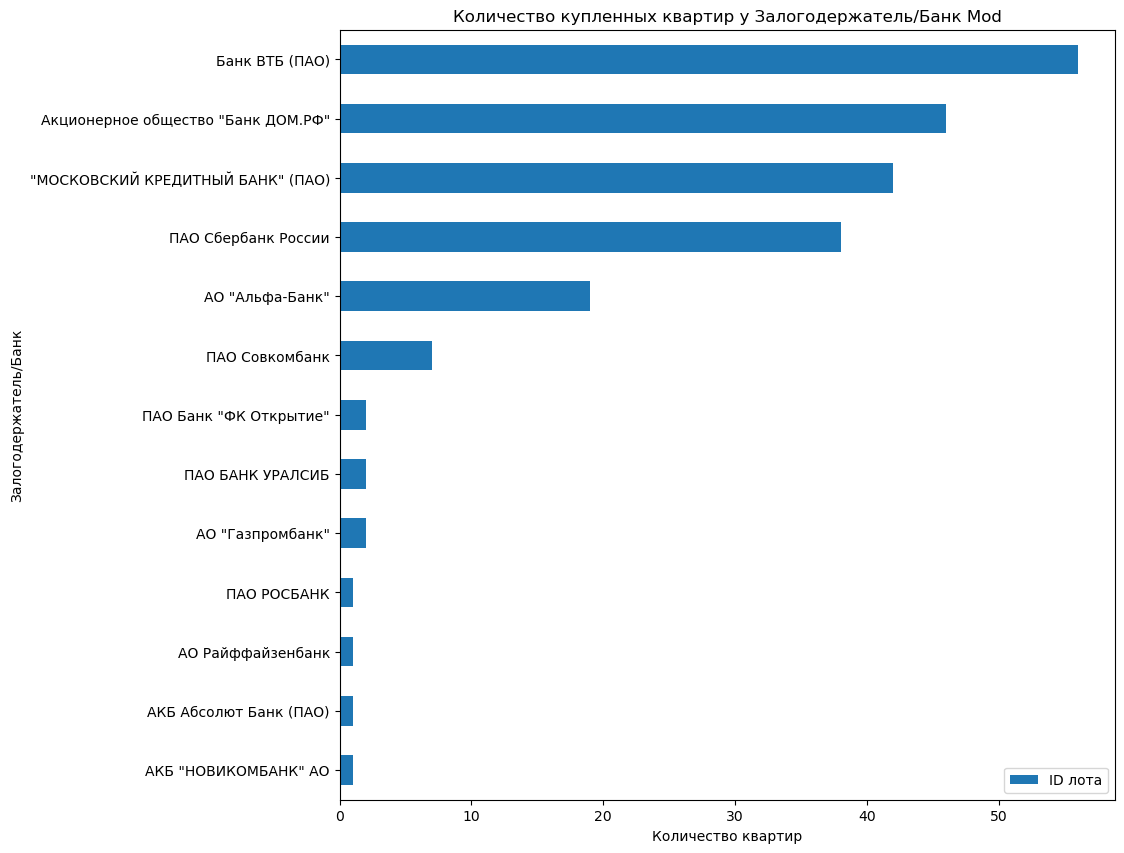

Залогодержатель/Банк  ID лота
1                 АКБ "НОВИКОМБАНК" АО        1
2               АКБ Абсолют Банк (ПАО)        1
5                    АО Райффайзенбанк        1
10                         ПАО РОСБАНК        1
4                     АО "Газпромбанк"        2
8                     ПАО БАНК УРАЛСИБ        2
9               ПАО Банк "ФК Открытие"        2
12                      ПАО Совкомбанк        7
3                      АО "Альфа-Банк"       19
11                 ПАО Сбербанк России       38
0    "МОСКОВСКИЙ КРЕДИТНЫЙ БАНК" (ПАО)       42
6   Акционерное общество "Банк ДОМ.РФ"       46
7                       Банк ВТБ (ПАО)       56

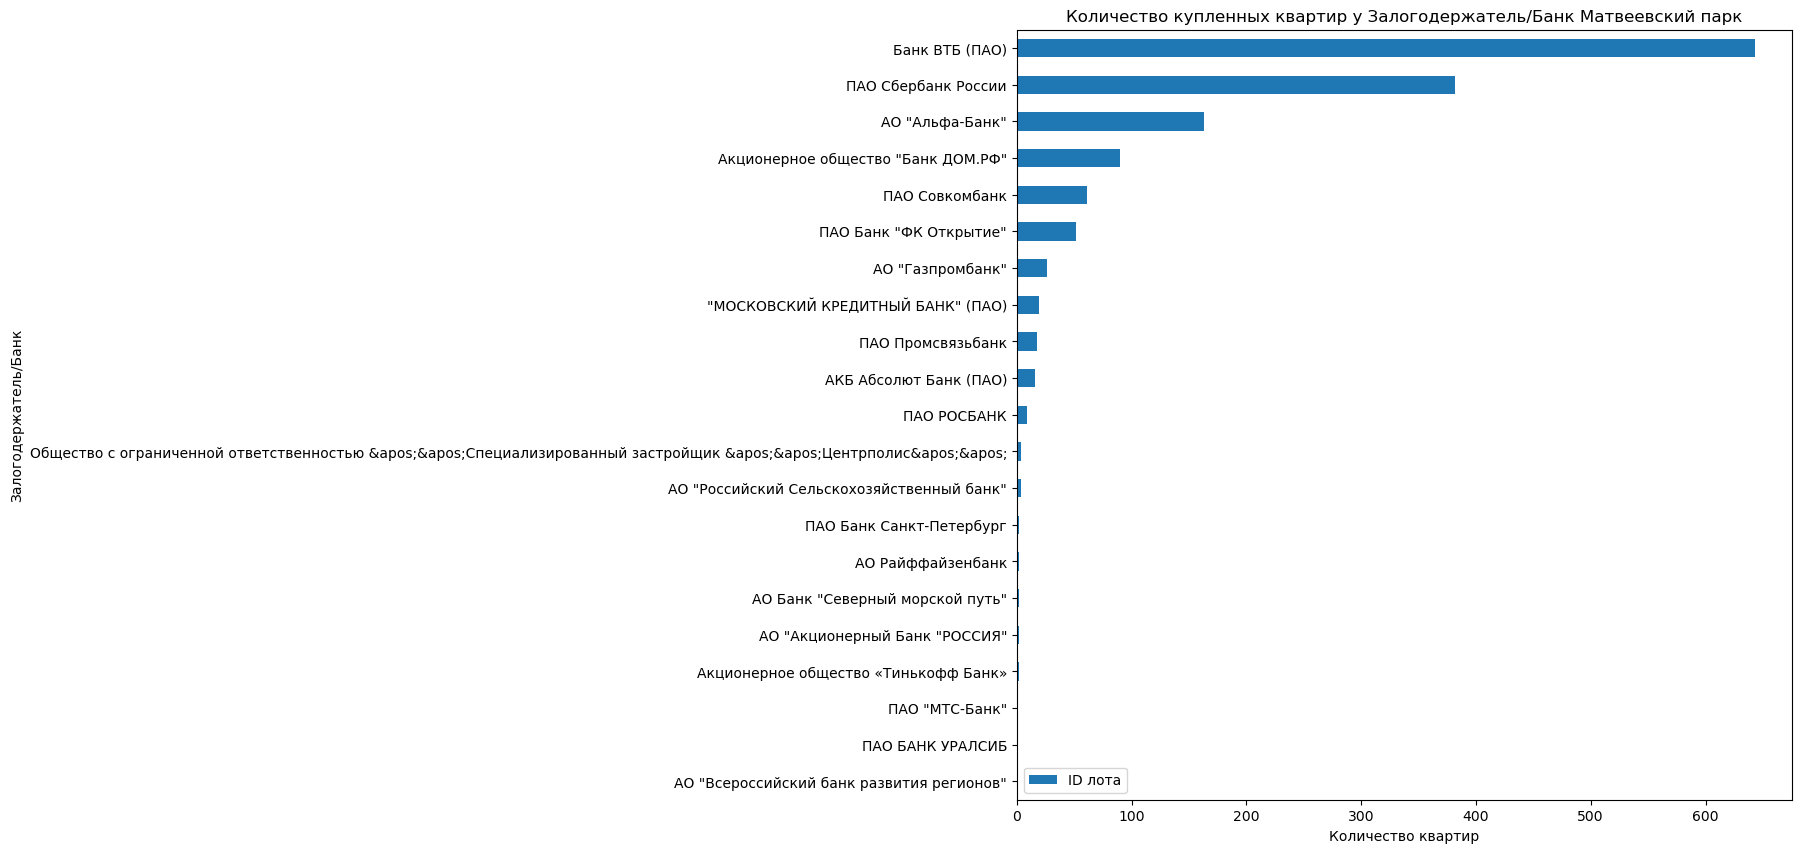

Залогодержатель/Банк  ID лота
4           АО "Всероссийский банк развития регионов"        1
14                                   ПАО БАНК УРАЛСИБ        1
13                                     ПАО "МТС-Банк"        1
10               Акционерное общество «Тинькофф Банк»        2
2                       АО "Акционерный Банк "РОССИЯ"        2
7                     АО Банк "Северный морской путь"        2
8                                   АО Райффайзенбанк        2
16                           ПАО Банк Санкт-Петербург        2
6           АО "Российский Сельскохозяйственный банк"        4
12  Общество с ограниченной ответственностью &apos...        4
18                                        ПАО РОСБАНК        9
1                              АКБ Абсолют Банк (ПАО)       16
17                                  ПАО Промсвязьбанк       18
0                   "МОСКОВСКИЙ КРЕДИТНЫЙ БАНК" (ПАО)       19
5                                    АО "Газпромбанк"       26
15                             ПАО Банк "ФК Открытие"       52
20                                     ПАО Совкомбанк       61
9                  Акционерное общество "Банк ДОМ.РФ"       90
3                                     АО "Альфа-Банк"      163
19                                ПАО Сбербанк России      382
11                                     Банк ВТБ (ПАО)      643

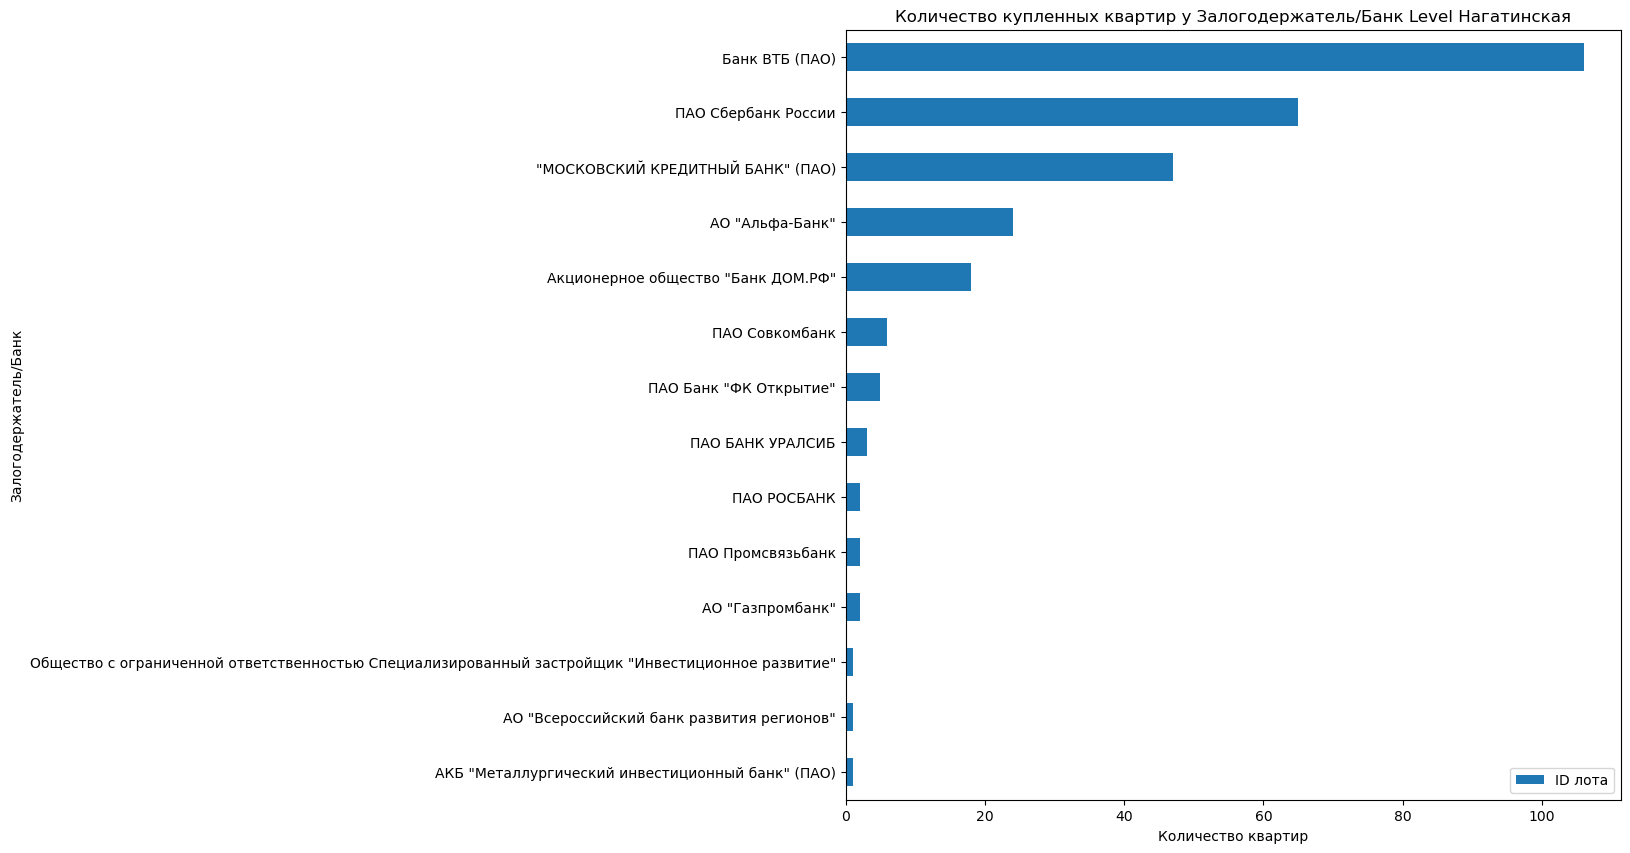

Залогодержатель/Банк  ID лота
1    АКБ "Металлургический инвестиционный банк" (ПАО)        1
3           АО "Всероссийский банк развития регионов"        1
7   Общество с ограниченной ответственностью Специ...        1
4                                    АО "Газпромбанк"        2
10                                  ПАО Промсвязьбанк        2
11                                        ПАО РОСБАНК        2
8                                    ПАО БАНК УРАЛСИБ        3
9                              ПАО Банк "ФК Открытие"        5
13                                     ПАО Совкомбанк        6
5                  Акционерное общество "Банк ДОМ.РФ"       18
2                                     АО "Альфа-Банк"       24
0                   "МОСКОВСКИЙ КРЕДИТНЫЙ БАНК" (ПАО)       47
12                                ПАО Сбербанк России       65
6                                      Банк ВТБ (ПАО)      106

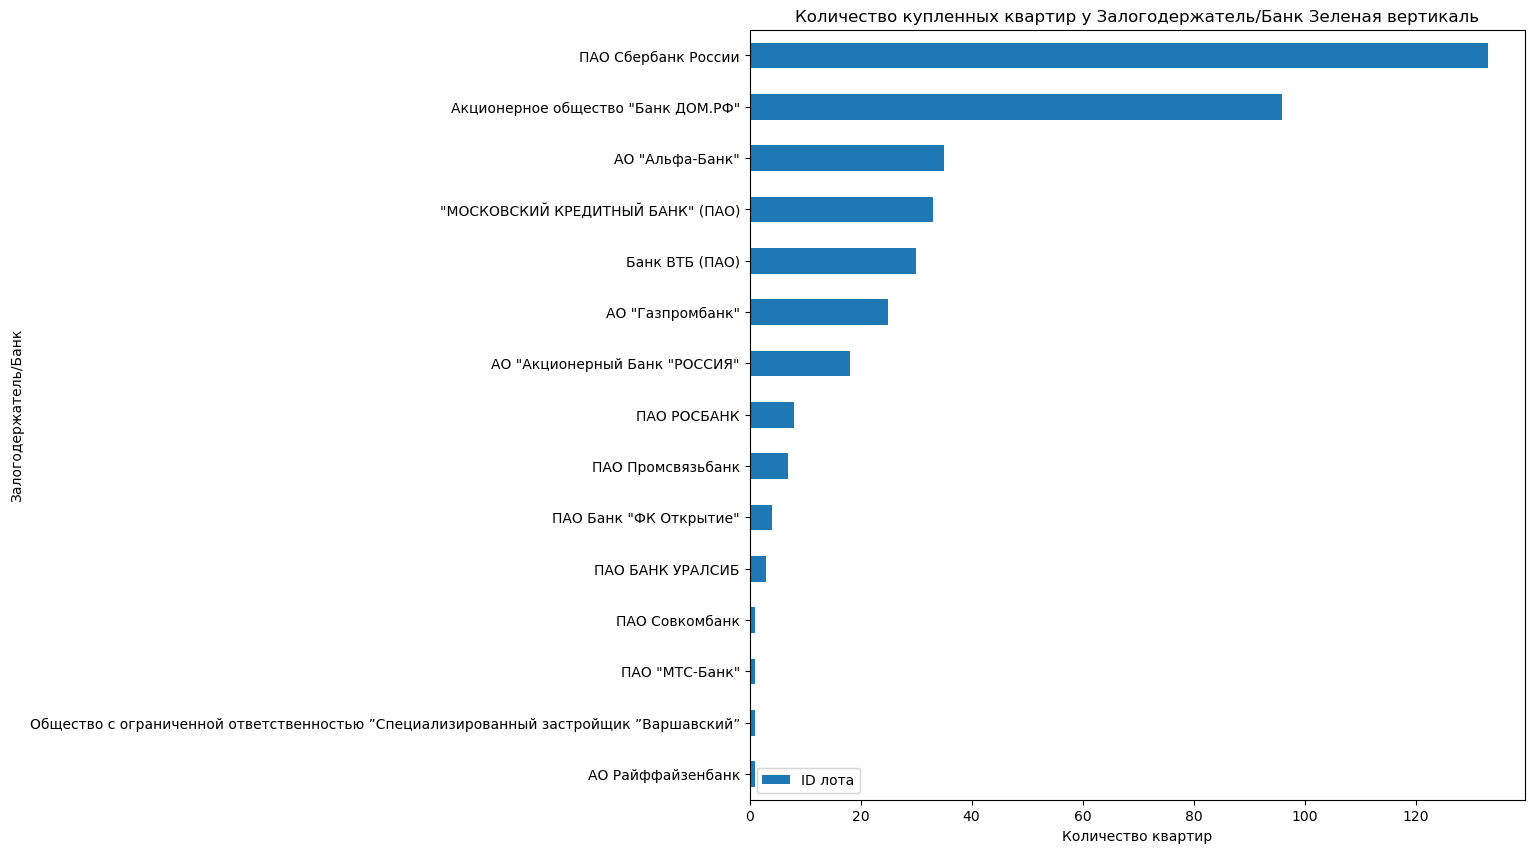

Залогодержатель/Банк  ID лота
4                                   АО Райффайзенбанк        1
7   Общество с ограниченной ответственностью ”Спец...        1
8                                      ПАО "МТС-Банк"        1
14                                     ПАО Совкомбанк        1
9                                    ПАО БАНК УРАЛСИБ        3
10                             ПАО Банк "ФК Открытие"        4
11                                  ПАО Промсвязьбанк        7
12                                        ПАО РОСБАНК        8
1                       АО "Акционерный Банк "РОССИЯ"       18
3                                    АО "Газпромбанк"       25
6                                      Банк ВТБ (ПАО)       30
0                   "МОСКОВСКИЙ КРЕДИТНЫЙ БАНК" (ПАО)       33
2                                     АО "Альфа-Банк"       35
5                  Акционерное общество "Банк ДОМ.РФ"       96
13                                ПАО Сбербанк России      133

In [34]:
def plot_bar_chart_bank(data, x_column, y_column, title):
    
    data.plot(x= 'Залогодержатель/Банк', y= 'ID лота', kind= 'barh', figsize=(10, 10))
    plt.xlabel('Количество квартир') 
    plt.ylabel('Залогодержатель/Банк')
    plt.title(title)
    plt.xticks()
    plt.show()

for project in desired_complexes:
  
    grouped_developer = filtered_df[filtered_df['Проект'] == project].groupby('Залогодержатель/Банк')['ID лота'].count().reset_index().sort_values(by='ID лота')
    plot_bar_chart_bank(grouped_developer, 'Залогодержатель/Банк', 'ID лота', 'Количество купленных квартир у Залогодержатель/Банк {}'.format(project))
    display(grouped_developer)

- Жилой комплекс "Остров": В данном ЖК количество купленных квартир у Залогодержателя/Банка различно. Некоторые Залогодержатели/Банки имеют по одной купленной квартире, в то время как Банк ВТБ (ПАО) приобрел наибольшее количество квартир (345), за ним следуют ПАО Сбербанк России (48) и Акционерное общество "Банк ДОМ.РФ" (47).


- Жилой комплекс "Mod": В данном ЖК количество купленных квартир у Залогодержателя/Банка также различно. Наибольшее количество квартир было приобретено Банком ВТБ (ПАО) (56), за ним следуют ПАО Сбербанк России (38) и "МОСКОВСКИЙ КРЕДИТНЫЙ БАНК" (ПАО) (42).


- Жилой комплекс "Матвеевский парк": В данном ЖК количество купленных квартир у Залогодержателя/Банка также различно. Наибольшее количество квартир было приобретено Залогодержателями/Банками Банком ВТБ (ПАО) (643), ПАО Сбербанк России (382) и Акционерным обществом "Банк ДОМ.РФ" (90).


- Жилой комплекс "Level Нагатинская": В данном ЖК количество купленных квартир у Залогодержателя/Банка различно. Наибольшее количество квартир было приобретено Банком ВТБ (ПАО) (106), за ним следуют ПАО Сбербанк России (65) и "МОСКОВСКИЙ КРЕДИТНЫЙ БАНК" (ПАО) (47).


- Жилой комплекс "Зеленая вертикаль": В данном ЖК количество купленных квартир у Залогодержателя/Банка также различно. Наибольшее количество квартир было приобретено ПАО Сбербанк России (133), за ним следуют Акционерное общество "Банк ДОМ.РФ" (96) и "МОСКОВСКИЙ КРЕДИТНЫЙ БАНК" (ПАО) (33).


**Обобщая данные, можно сделать вывод, что в каждом из рассмотренных жилых комплексов различные Залогодержатели/Банки приобретают квартиры в разной степени активности. Банк ВТБ (ПАО) и ПАО Сбербанк России часто фигурируют среди основных приобретателей квартир в этих ЖК.**

## Посмотрим продажи по кварталам

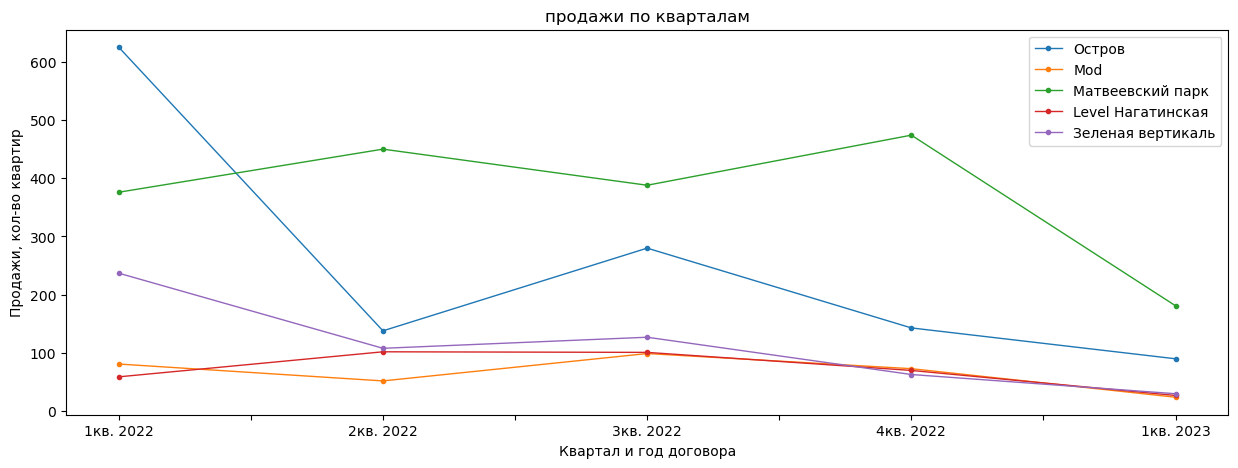

In [35]:
import seaborn as sns

new_order = ['1кв. 2022', '2кв. 2022', '3кв. 2022', '4кв. 2022', '1кв. 2023']
for project in desired_complexes:
    df_to_plot = filtered_df.query('Проект == @project')
    df_to_plot = df_to_plot.groupby('Квартал и год договора')['ID лота'].count()
    df_to_plot = df_to_plot.reindex(new_order)
    df_to_plot.plot(x='Квартал и год договораb', y='ID лота', style='.-', kind='line', fontsize=10,
                                                                    linewidth=1, label=project, figsize=(15,5), legend = project, ylabel='Продажи, кол-во квартир', title='продажи по кварталам')

**В ЖК остров набдлюдается резкий спад после 1 квартала, но частично восстанавливается к 3 кварталу. Общий тренд на спад к 1 кварталу 2023 года.**

## Медиана Кол-во месяцев обременения

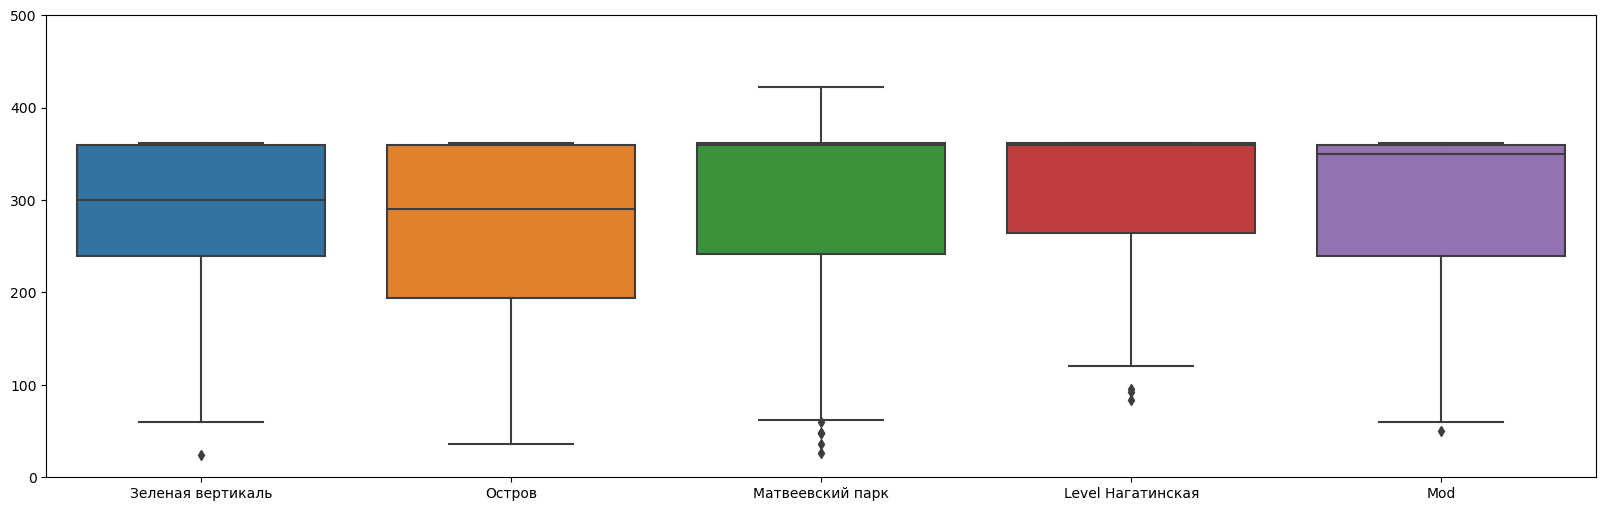

In [36]:
plt.figure(figsize=(20,6))

ax = sns.boxplot(x='Проект', y='Кол-во месяцев обременения', data=filtered_df)
ax.set_ylim(0, 500)
ax.set_ylabel('')
ax.set_xlabel('')
ax.set_title('')
plt.show()

# Распределение общей площади квартиры в зависимости от ЖК

In [37]:
# строим гистограммы
fig = px.histogram(filtered_df, # загружаем данные
                   x='Площадь согласно ПД', # указываем столбец с данными для оси X
                   color='Проект', # обозначаем категорию для разделения цветом
                   range_x=[15, 180], # ограничиваем ось X
                   title='Распределение Площадь согласно ПД в зависимости от ЖК', # указываем заголовок
                   nbins=500, # назначаем число корзин
                   barmode='overlay') # выбираем «полупрозрачный» тип отображения столбцов
fig.update_xaxes(title_text='Площадь согласно ПД') # подпись для оси X
fig.update_yaxes(title_text='Частота') # подпись для оси Y
fig.show() # выводим график

## Посмотрим класс квартир

In [38]:
for project in desired_complexes:
    display('класс квартир ЖК {}: {}'.format(project, filtered_df[filtered_df['Проект'] == project]['Класс'].unique()))

"класс квартир ЖК Остров: ['Бизнес+']"

"класс квартир ЖК Mod: ['Бизнес+']"

"класс квартир ЖК Матвеевский парк: ['Комфорт']"

"класс квартир ЖК Level Нагатинская: ['Бизнес-']"

"класс квартир ЖК Зеленая вертикаль: ['Эконом']"

## Посмотрим округ

In [39]:
for project in desired_complexes:
    display('округ ЖК {}: {}'.format(project, filtered_df[filtered_df['Проект'] == project]['Округ'].unique()))
    

"округ ЖК Остров: ['СЗАО']"

"округ ЖК Mod: ['СВАО']"

"округ ЖК Матвеевский парк: ['ЗАО']"

"округ ЖК Level Нагатинская: ['ЮАО']"

"округ ЖК Зеленая вертикаль: ['ЮАО']"

## Посмотрим Девелопера

In [40]:
for project in desired_complexes:
    display('Девелопер ЖК {}: {}'.format(project, filtered_df[filtered_df['Проект'] == project]['Девелопер'].unique()))

"Девелопер ЖК Остров: ['Донстрой']"

"Девелопер ЖК Mod: ['MR Group']"

"Девелопер ЖК Матвеевский парк: ['ПИК']"

"Девелопер ЖК Level Нагатинская: ['Level Group']"

"Девелопер ЖК Зеленая вертикаль: ['Э.К. Девелопмент']"

### Итоговый вывод по жилым комплексам "Остров", "Mod", "Матвеевский парк", "Level Нагатинская" и "Зеленая вертикаль" с учетом предоставленных данных следующий:

- Жилой комплекс "Остров" расположен в Северо-Западном административном округе Москвы. Он состоит из квартир с разным количеством комнат, преобладающими являются 1- и 2-комнатные квартиры. Большинство квартир в классе "Бизнес+" и застройщиком выступает Донстрой. Залогодержателем/банком чаще всего является Банк ВТБ (ПАО) 345 сделок.


- Жилой комплекс "Mod" расположен в Северо-Восточном административном округе Москвы. В нем преобладают 2-комнатные квартиры. Класс квартир - "Бизнес+". Застройщиком выступает MR Group. Залогодержателем/банком чаще всего является Банк ВТБ (ПАО) 56 сделок.

- Жилой комплекс "Матвеевский парк" расположен в Западном административном округе Москвы. Он включает в себя квартиры с разным количеством комнат, преобладают 1- и 2-комнатные варианты. Класс квартир - "Комфорт". Застройщиком выступает ПИК. Залогодержателем/банком чаще всего является банк ВТБ (ПАО) 643 сделок.


- Жилой комплекс "Level Нагатинская" расположен в Южном административном округе Москвы. Он включает в себя квартиры с разным количеством комнат, преобладают 2-комнатные варианты. Класс квартир - "Бизнес-". Застройщиком выступает Level Group. Залогодержателем/банком чаще всего является Банк ВТБ (ПАО) (106) сделок, за ним следуют ПАО Сбербанк России (65) сделок.


- Жилой комплекс "Зеленая вертикаль" расположен в Южном административном округе Москвы. В нем преобладают 1- и 2-комнатные квартиры. Класс квартир - "Эконом". Застройщиком выступает Э.К. Девелопмент. Залогодержателем/банком чаще всего является ПАО Сбербанк России (133), за ним следуют Акционерное общество "Банк ДОМ.РФ" (96)

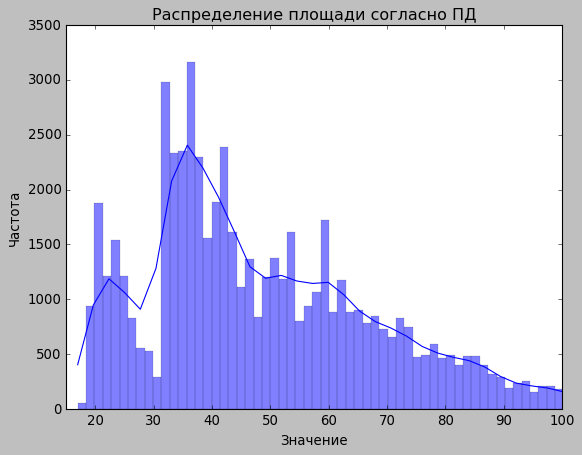

In [41]:
# назначаем классический стиль для графика с помощью matplotlib
plt.style.use('classic')
# строим гистограмму для столбца Площадь согласно ПД, добавив график кривой KDE
sns.histplot(x='Площадь согласно ПД', data=excel_data, kde=True)
# ограничиваем ось X для наглядности
plt.xlim(15, 100)
# указываем заголовок графика и подписи осей средствами matplotlib
plt.title('Распределение площади согласно ПД')
plt.xlabel('Значение')
plt.ylabel('Частота')
# отображаем график на экране
plt.show()